# Analisi dati relazione 2, esperienza 4
_martedì 21 dicembre_


## Osservazioni sulle relazioni di laboratorio n. 1

### Osservazioni sui fit

Spesso ci affidiamo troppo al risultato del fit, trascurando l'effettivo risultato del fit, ovvero osservando i valori di $\chi^2/\text{ndf}$ e poi verificandone così la bontà.

> Si può in effetti provare ad escludere alcuni punti da quelli utilizzati per esempi osservando che siano messi fuori dalla linea del fit.

### Osservazioni sul fattore di merito

Il fattore di merito $Q$ del circuito RLC si presentava come

$$
H(\omega) = \frac{R}{R+R_L + j\left(\omega L  \frac{1}{\omega C}\right)}
$$

che riscrivendo in termini di modulo diventa necessariamente

$$
|H(\omega)| = \frac{1}{\left(1+ \frac{R}{R_L}\right) + Q_{id}\left(\frac{\omega}{\omega_0}-\frac{\omega_0}{\omega}\right)}
$$

dove però il fattore di merito è un fattore di merito ideal, mantre osserviamo l'esistenza di un fattore di merito $Q_{reale}$ reale, che tiene conto delle caratteristiche di impedenza dell'induttanza, dove effettivamente il suo valore dipende da diversi fattori come

$$
Q_{reale} = \frac{\sqrt{L}}{R_{tot} \sqrt{C}}
$$

dove $R_{tot}$ dipende da tutte le resistenze presenti nel circuito.

> (Il modo di ovviare a questo problema forse lo possiamo trovare nel considerare $L_0$ come il valore di $L$ trovato non dai calcoli ma dal valore di $L_0$ misurato nel caso libero)

### Osservazioni sui risultati ottenuti

Utilizzare senso fisico per descrivere il fenomeno osservato.

Rileggendo la relazione osservo che in effetti non sono forniste esaustive giustificazioni riguardo al valore di $\mu_R \text{(Al)}$ ottenuto ($\mu_R\text{(Al)} = 0.446(53)$) non corrisponde al modello (materiale paramagnetico).

In [1]:
//%jsroot on
gInterpreter->AddIncludePath("/usr/local/include");
gSystem->Load("/usr/local/lib/libErrorAnalysis");
gSystem->Load("/usr/local/lib/libLabTools");

#include<vector>
#include<cmath>
#include<iostream>
#include<fstream>
#include<string>

#include<TCanvas.h>
#include<TGraphErrors.h>
#include<TF1.h>
#include<TStyle.h>
#include<TAxis.h>
#include<TMath.h>
#include<TLatex.h>
#include<TLegend.h>

In [2]:
#include<ErrorAnalysis.h>
#include<LabTools.h>

In [3]:
std::string pfix = "../dati/_zeroed/";
const int full_dataT_s = 8;
std::string all_data_table[] = {
    "dati_2.txt",  //> 0
    "dati_4.txt",  //> 1
    "dati_5.txt",  //> 2
    "dati_6.txt",  //> 3
    "dati_8.txt",  //> 4 
    "dati_10.txt", //> 5
    "dati_12.txt", //> 6
    "dati_20.txt" //> 7
};

std::ifstream data_table;

## Commenti Carlo Schiavi su possibili modelli per analizzare le curve di riscaldamento della lampadina

Abbiamo dei dati che rappresentano delle curve di riscaldamento, dobbiamo individuare quali sono le quantità che misuriamo e quelle che possiamo individuare attraverso dei calcoli. 

#### Cosa abbiamo misurato?

Abbiamo ottenuto delle curve di dati di tensione in funzione del tempo. 

Mi sono venuti in mente più modi per scegliere il modello su come affrontare questi dati?

_Quantità da misurare?_

Ci interessa misurare una differenza di tensione $\Delta V$. 

### Considerazioni di tipo fisico

La lampadina scalda il PT100, che però prima passa attraverso il vetro, che però poi passa attraverso una bolla d'aria. 

Quantità da misurare: Variazione di tensione in funzione del tempo $\Delta V (\Delta t)$

Definisco queste qunatità come segue:
- scelgo tempo $t=0$ quando accendo la lampadina;
- scelgo $\Delta t$ tale che io possa rimanere in regime di irraggiamento

Lasciamo per ora indietro il discorso sull'incertezza.

Arbitrarietà:
- Scelta di $\Delta t$: come cambiano i risultati scegliendo un altro valore di questo intervallo?  
(NOTA: interessante potrebbe essere notare cosa succede se sceglo un $\Delta t$ con valori anche nell'intervallo del secondo regime.
- Sistematica basata sullo studio del risultato finale con diversi $\Delta t$.

### Esempio funzionale per lo studio dei modelli possibili

Procedo ad analizzare le misure effettuate ad una distanza di .05 m 

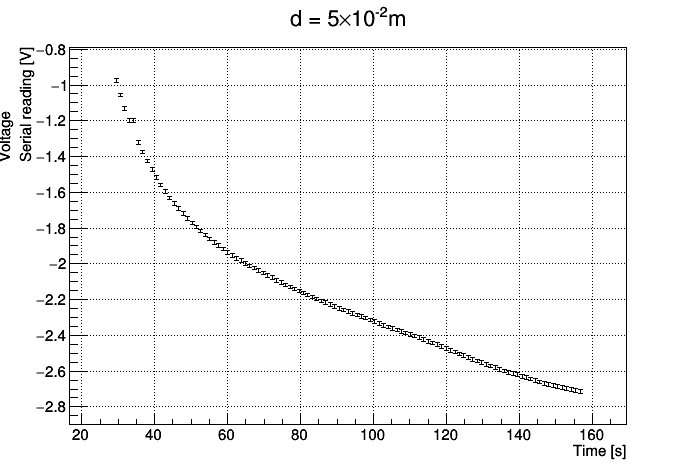

In [4]:
data_table.open((pfix + all_data_table[2]).c_str());
TCanvas c1;
c1.SetGrid();
TGraphErrors g;

double t, vin, evin, range; 

for(int j=0; data_table >> t >> vin >> evin >> range; j++){
    g.SetPoint(j, t, vin);
    g.SetPointError(j, 0, 0.01);
}
g.Draw("Ap");
g.SetTitle("d = 5#times10^{-2}m;Time [s]; #splitline{Voltage}{Serial reading [V]}");
c1.Draw();
data_table.close();

#### Come potremmo calcolare la variazione di tensione rispetto al tempo

##### Modello #1 (linearizzazione sul primo fronte di discesa)

Considerando solo i primi punti rispetto a $t=0$, preso quando viene accesa la lampadina, testare un modello lineare che prevede un andamento del tipo 

$$
V_{\text{out}}(t) = \text{(param0)} \cdot t + \text{(param1)}
$$

dove quindi possiamo individuare l'effettiva velocità $dV/dt$ con cui la tensione cambia rispetto al tempo. A questo punto poi la trattazione procede.

##### Modello #2 (valutazione della variazione senza modellizzare la curva)

Procediamo azzerando i valori della tensione a $t=0$ s quando la lampadina viene accesa, considerando poi un intervallo sensato (_vedere dopo_) possiamo leggere la misura della tensione, poi valutare quindi la variazione. 

Per scegliere un intervallo sensato bisogna effettuare alcuni ragionamenti di come si propaga il calore e di come quindi interagisce con il PT100, e come risponde lo strumento. 

All'accensione dalla lampadina la luce viaggia a velocità $c$ quindi possiamo di fatto ocnsiderare la sua iterazione con il termometro al platino immediata. Dopo un po' di tempo però con il termometro interviene un secondo fattore che non permette una imsura veritiera della temeperatura. Dentro alla struttura del termometro infatti aria intrappolata si scalda e dopo un certo intervallo (impossibile determinarlo solo con pochi dati a disposizione) interviene e contribuisce alla variazione della temperatura letta dallo strumento. Quindi non osserviamo più solo una lettura dell'irraggiamento, ma osserviamo anche una misura della temperatura dell'ambiente circostante, che interviene in modo importante e principale dopo un certo intervallo $\Delta t_1$. misurando quindi la variazione di tensione entro $\Delta t_1$ possiamo di fatto trascurare questo fatto. Potrebbe essere interessante procedere invece ad evidenziare intervalli successivamente grandi $\Delta t_2$, $\Delta t_3$, ... per vedere come si può comportare il risultato finale. 

##### Modello #3 (derivazione fine del modello #2)

Procedere in modo simile al #2 ma di fatto effettuare alcune considerazioni sugli errori ottenuti da alcune considerazioni sulla variazione effettiva della tensione sul tempo.

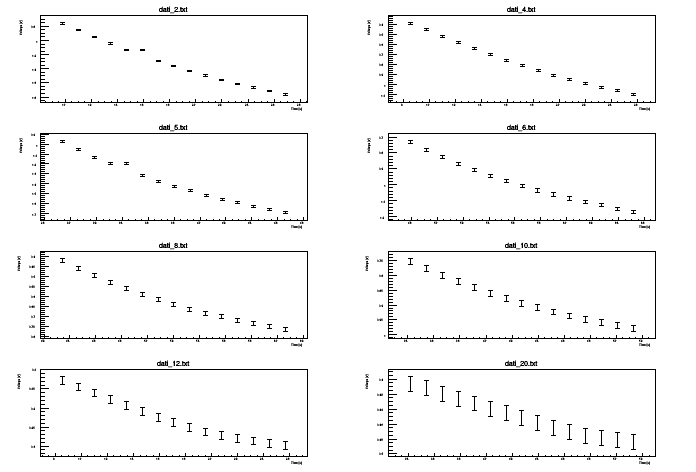

In [5]:
TCanvas *c3 = new TCanvas();
c3->Divide(2,4);

for(int k=0; k<8; k++){
    ifstream *data = new ifstream((pfix + all_data_table[k]).c_str());
    TGraphErrors *g1 = new TGraphErrors();
    for(int j=0; (*data >> t >> vin >> evin >> range) && j<15; j++){
        g1->SetPoint(j, t, vin);
        g1->SetPointError(j, 0, 0.01);
    }
    c3->cd(k+1);
    g1->Draw("Ap");
    g1->SetTitle((all_data_table[k] + ";Time [s]; Voltage [V]").c_str());
    data->close();
}
c3->Draw();

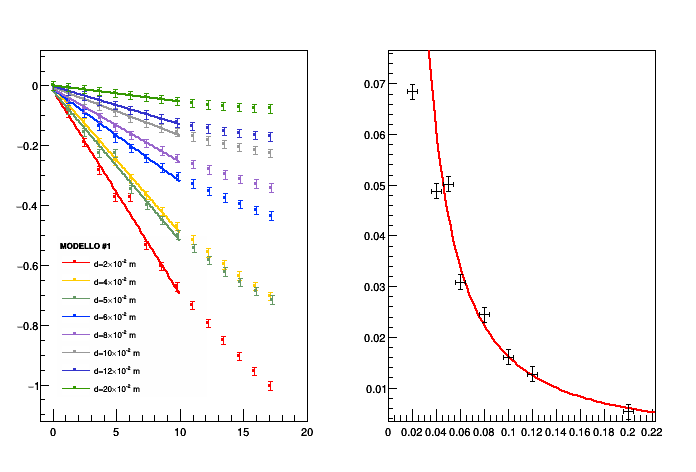

[-0.0684045 +- 0.0014832]
[-0.0488412 +- 0.00147613]
[-0.0501772 +- 0.00146523]
[-0.0308415 +- 0.00147008]
[-0.0244878 +- 0.00147526]
[-0.0160445 +- 0.00147859]
[-0.0127483 +- 0.00148104]
[-0.00536735 +- 0.00148098]
 FCN=9.10889 FROM MIGRAD    STATUS=CONVERGED     154 CALLS         155 TOTAL
                     EDM=2.54373e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           5.75909e-04   1.96940e-04   4.14331e-08  -6.59347e-01
   2  p1           1.45078e+00   1.32434e-01   2.78778e-05  -8.64970e-04


In [6]:
TCanvas c4;
c4.Divide(2,1);
double d[8] = {0.02, 0.04, 0.05, 0.06, 0.08, 0.1, 0.12, 0.2};
double dVdt[8];
double err_dVdt[8];

Color_t mk[8] = {kRed, kOrange, kGreen-5, kAzure, kViolet-8, kGray+1, kBlue-3, kSpring-6};
//Color_t mk[8] = {100, 95, 90, 84, 65, 225, 57, 223};

c4.cd(1);

TLegend *l = new TLegend(0.15, 0.15, 0.6, 0.5);
l->SetHeader("#bf{MODELLO #1}");
l->SetBorderSize(0);
l->SetFillColorAlpha(kWhite, 0);

for(int k = 0; k<8; k++){
    TGraphErrors *g1 = new TGraphErrors();
    ifstream data((pfix + all_data_table[k]).c_str());
    std::string dist = all_data_table[k].substr(all_data_table[k].find("_")+1, 
                                                all_data_table[k].find(".")-all_data_table[k].find("_")-1);

    g1->SetName(("g1_"+dist).c_str());
    
    double t1, v1, ev1, range1;

    data >> t1 >> v1 >> ev1 >> range1;

    g1->SetPoint(0, 0, 0);
    g1->SetPointError(0, 0, 0.014);
    const double t0 = t1; // zeroing data
    const double v0 = v1;

    for(int j = 1; (data >> t1 >> v1 >> ev1 >> range1) && (j<15); j++){
        g1->SetPoint(j, t1-t0, v1-v0);
        g1->SetPointError(j, 0, 0.014);
    }
    data.close();

    TF1 *mod1 = new TF1(("mod1_"+ dist).c_str(), "[0]*x+[1]", 0, 10);
    graphset::setmarker(g1, mod1, mk[k], 21, 0.4);
    mod1->SetParameter(0, 0.1);

    //logs::print_mmsg(("processing graph" + all_data_table[k]).c_str());
    
    g1->Draw((k==0)? "ap":"p");
    g1->Fit(("mod1_"+ dist).c_str(), "Q", "", 0, 10);
    l->AddEntry(("g1_"+ dist).c_str(), ("d=" + dist + "#times10^{-2} m").c_str());
    g1->GetXaxis()->SetLimits(-1, 20);

    std::cout << "[" << mod1->GetParameter(0) << " +- " << mod1->GetParError(0) << "]" << std::endl;

    //logs::print_stat(mod1);
    dVdt[k] = mod1->GetParameter(0);
    err_dVdt[k] = mod1->GetParError(0);
}
l->Draw();

c4.cd(2);
TGraphErrors *plot = new TGraphErrors();
for(int j=0; j<8; j++){
    // if(j==2) continue;
    plot->SetPoint(j, d[j], abs(dVdt[j]));
    plot->SetPointError(j, 0.004, err_dVdt[j]); // Stima dell'errore sulla distanza ad 1e-2 m
}
plot->Draw("ap");

TF1 *fit_mod1 = new TF1("fit_mod1", "[0]/pow(x, [1])");
fit_mod1->SetParameter(0, 0.1);
fit_mod1->SetParameter(1,2);

plot->Fit("fit_mod1");

c4.Draw();

leggo il file relativo alla valutazione del rumore

In [7]:
std::string rumore = "../dati/valutazione_rumore.txt";

#### Considerazioni sull'incertezza

Come possiamo fare a valutare il valore di errore sulla misura di tensione?

Abbiamo raccolto un set di dati che rappresentato il valore di tensione letta quando la lampadina era spenta e quando solo la strumentazione era messa in tensione. 

Eseguendo un histo, possiamo effettivamente vedere se i dati si dispongono secondo una gausssiana, e nel caso effettivamente misurare come valore di errore a $1\sigma$ la dev. std. dell'istogramma.

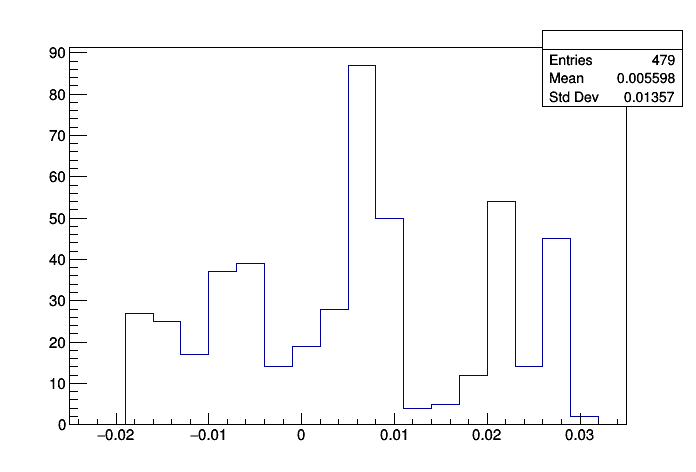

In [8]:
TCanvas c2;
double T, V, eV, range, crange;
std::ifstream file(rumore.c_str());
TH1D hist("", "", 20, -25e-3, 35e-3);
while (file >> T >> V >> eV >> range >> crange){hist.Fill(V);}
TF1 hf("hf", "gaus");
hist.Draw("HIST");
c2.Draw();

#### Alcune note finali

Andando ad eseguire un fit lineare sui primi 5/6 punti, ovvero fino a quando possiamo effettivamente osservare un regime lineare, posso trovare la velocità a cui il corpo si scalda. 

#### Valutazione errore

La curva in valutazione errore non presenta una guassiana perfetta. 
Potremmo procedere per batches, ovvero dividendo i punti, che sono effettivamente tanti, in batch da 40/50 punti e poi procedere a misurare RMS su questi valori, a questo punto poi verificarne la compatibilità e quindi verificare come di comportino singolarmente. 